In [155]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
import seaborn as sns

import pickle
from utils_ens import get_Xy_tt
from sklearn import metrics


In [160]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/xgb_hp_df.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/xgb_hp_df.pkl', 'rb')
xgb_hp_df = pickle.load(pkl_file)
pkl_file.close()

xgb_hp_df.sort_values('AP', ascending = False)

learning_rate   booster importance_type     gamma  max_depth  \
7       0.058458      dart            gain  1.781537          4   
8       0.062215    gbtree           cover  1.758837          5   
1       0.018511      dart            gain  1.951245          6   
5       0.040921    gbtree            gain  0.098524          4   
4       0.054864    gbtree     total_cover  0.689383          8   
0       0.041804    gbtree            gain  0.704263          3   
2       0.081305    gbtree          weight  1.107679          8   
6       0.090845      dart            gain  1.566843         10   
3       0.053341    gbtree     total_cover  0.963043          2   
9       0.020715  gblinear           cover  1.618872          4   

   max_delta_step  colsample_bytree  reg_alpha  reg_lambda  min_child_weight  \
7               9          0.544951   0.346619    0.241949                 4   
8               2          0.896051   0.104277    0.738241                 8   
1               6          0.826631   0.767132    0.221207                 6   
5               6          0.475667   0.310826    0.167617                 8   
4               5          0.982463   0.196603    0.052920                 1   
0               4          0.903682   0.612323    0.514012                 7   
2               8          0.493661   0.834165    0.143924                 7   
6               6          0.569658   0.326045    0.304439                 2   
3               5          0.612130   0.382619    0.514248                 2   
9               7          0.371388   0.054054    0.123589                 8   

   scale_pos_weight  base_score  n_estimators  \
7          0.043870    0.145492           110   
8          0.553690    0.247732           117   
1          0.957405    0.810114           126   
5          0.794933    0.614256           124   
4          0.268665    0.792049           148   
0          0.554584    0.242940           120   
2          0.920073    0.265006           118   
6          0.930088    0.753697           112   
3          0.823209    0.319441           115   
9          0.128658    0.099722           137   

                                          test_preds        AP  \
7  [0.00023733843, 0.00023733843, 0.00023733843, ...  0.209996   
8  [0.00017077668, 0.00017077668, 0.00017077668, ...  0.209096   
1  [0.07750878, 0.07750878, 0.07750878, 0.0775087...  0.208070   
5  [0.0038017393, 0.0038017393, 0.0038017393, 0.0...  0.206067   
4  [0.00022630897, 0.00022630897, 0.00022630897, ...  0.204034   
0  [0.0016096047, 0.0016096047, 0.0016096047, 0.0...  0.202867   
2  [1.921397e-05, 1.921397e-05, 1.921397e-05, 1.9...  0.202031   
6  [2.7640983e-05, 2.7640983e-05, 2.7640983e-05, ...  0.198826   
3  [0.00071602047, 0.00071602047, 0.00071602047, ...  0.196311   
9  [0.00605886, 0.00605886, 0.00605886, 0.0060588...  0.003060   

                                                  PR  \
7  ([0.003059536074427898, 0.018197681665212514, ...   
8  ([0.003059536074427898, 0.022995599441880434, ...   
1  ([0.003059536074427898, 0.022618643403766292, ...   
5  ([0.003059536074427898, 0.0072800995254112336,...   
4  ([0.003059536074427898, 0.022585270920823516, ...   
0  ([0.003059536074427898, 0.03031232036788657, 0...   
2  ([0.003059536074427898, 0.006047363894245922, ...   
6  ([0.003059536074427898, 0.0068693644909553365,...   
3  ([0.003059536074427898, 0.014940210344330788, ...   
9          ([0.003059536074427898, 1.0], [1.0, 0.0])   

                                                 ROC  
7  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
8  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
5  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
0  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6096305...  
6  ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3  ([

0.18403585368289735


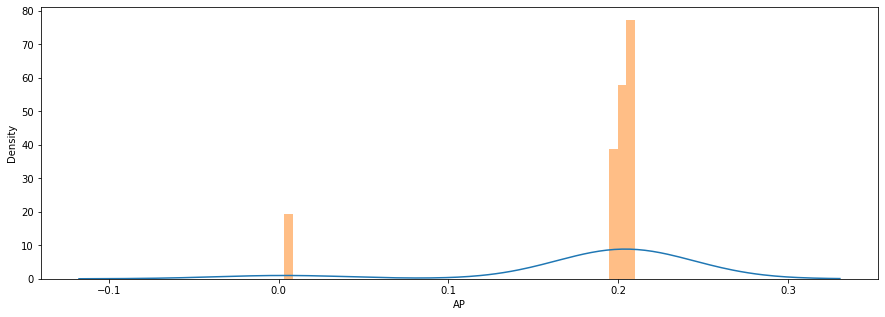

In [161]:
print(xgb_hp_df['AP'].mean())

plt.figure(figsize = [15,5])
plt.hist(xgb_hp_df['AP'], bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(xgb_hp_df['AP'])
plt.show()

In [162]:
xgb_hp_df.columns

Index(['learning_rate', 'booster', 'importance_type', 'gamma', 'max_depth',
       'max_delta_step', 'colsample_bytree', 'reg_alpha', 'reg_lambda',
       'min_child_weight', 'scale_pos_weight', 'base_score', 'n_estimators',
       'test_preds', 'AP', 'PR', 'ROC'],
      dtype='object')

0
1
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
2
3
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
4
5
/home/simon/anaconda3/envs/xgb_en

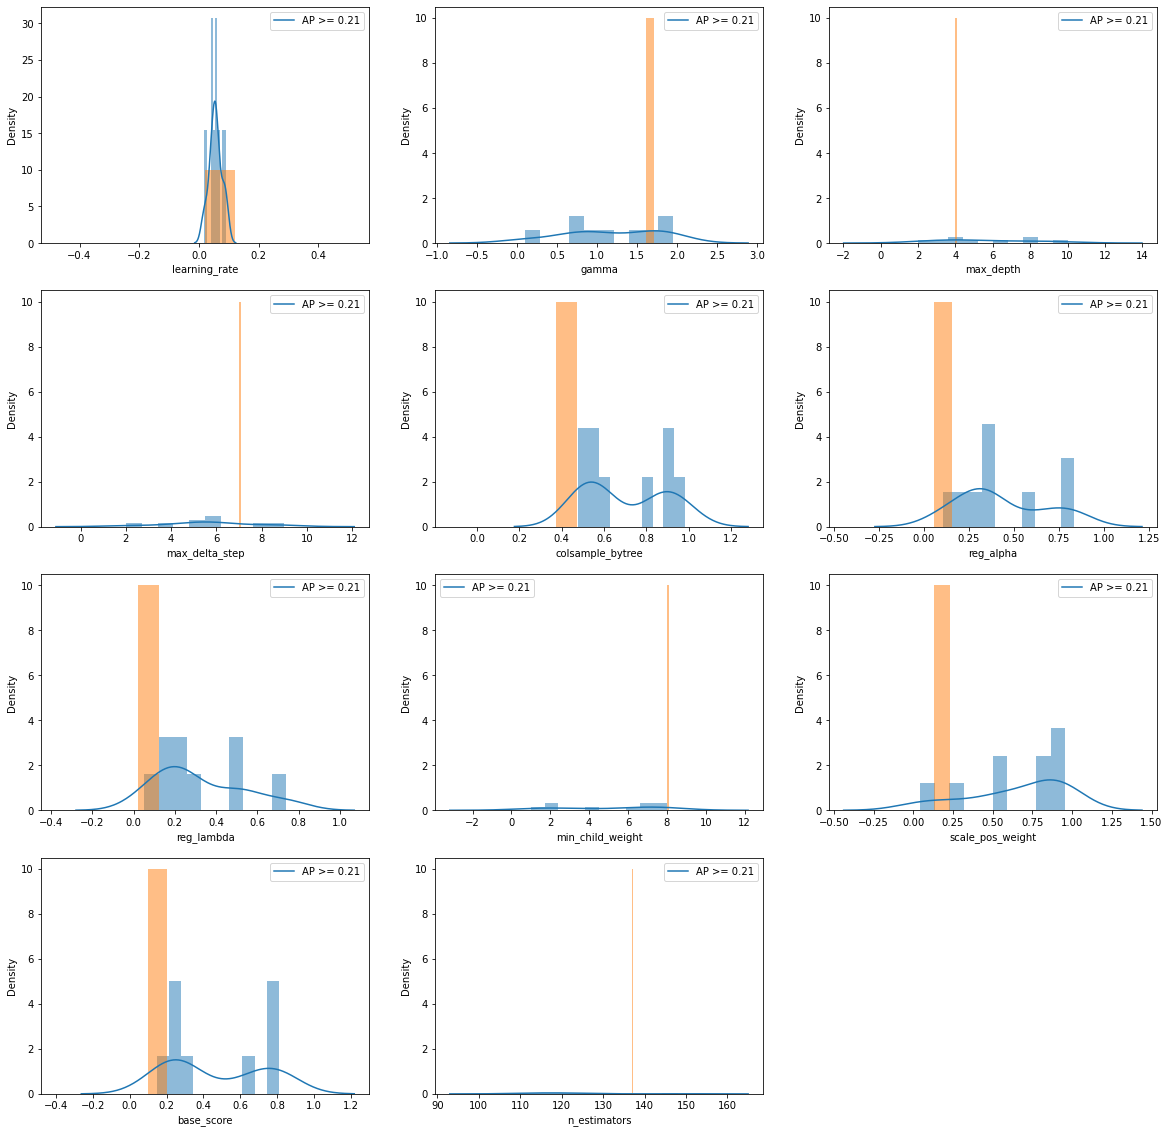

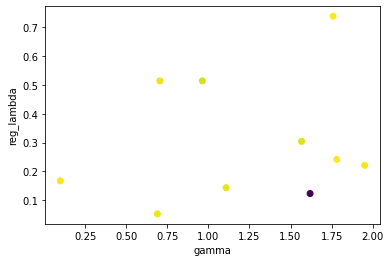

In [167]:
plt.figure(figsize = [20,20])

continues_features = ['learning_rate', 'gamma', 'max_depth', 
                      'max_delta_step', 'colsample_bytree', 'reg_alpha', 'reg_lambda',
                      'min_child_weight', 'scale_pos_weight', 'base_score', 'n_estimators']

for i,j in enumerate(continues_features):
    print(i)
    plt.subplot(4,3,i+1)

    sns.kdeplot(xgb_hp_df[xgb_hp_df['AP'] >= 0.18][j], label = 'AP >= 0.21', bw_method= 0.5) 
    sns.kdeplot(xgb_hp_df[xgb_hp_df['AP'] < 0.18][j], label = 'AP < 0.21', bw_method= 0.5)

    plt.hist(xgb_hp_df[xgb_hp_df['AP'] >= 0.18][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(xgb_hp_df[xgb_hp_df['AP'] < 0.18][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()

# I have looked at hte other parameters and there does not appear to be a relationship

plt.scatter(xgb_hp_df['gamma'], xgb_hp_df['reg_lambda'], c= xgb_hp_df['AP'])
plt.xlabel('gamma')
plt.ylabel('reg_lambda')

# x_grid = np.arange(0.1,1.1,0.1)
# y_grid = x_grid * 0.52

# plt.plot(x_grid, y_grid)

plt.show()

In [168]:
X_train, y_train, X_test, y_test = get_Xy_tt(local = True)

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)


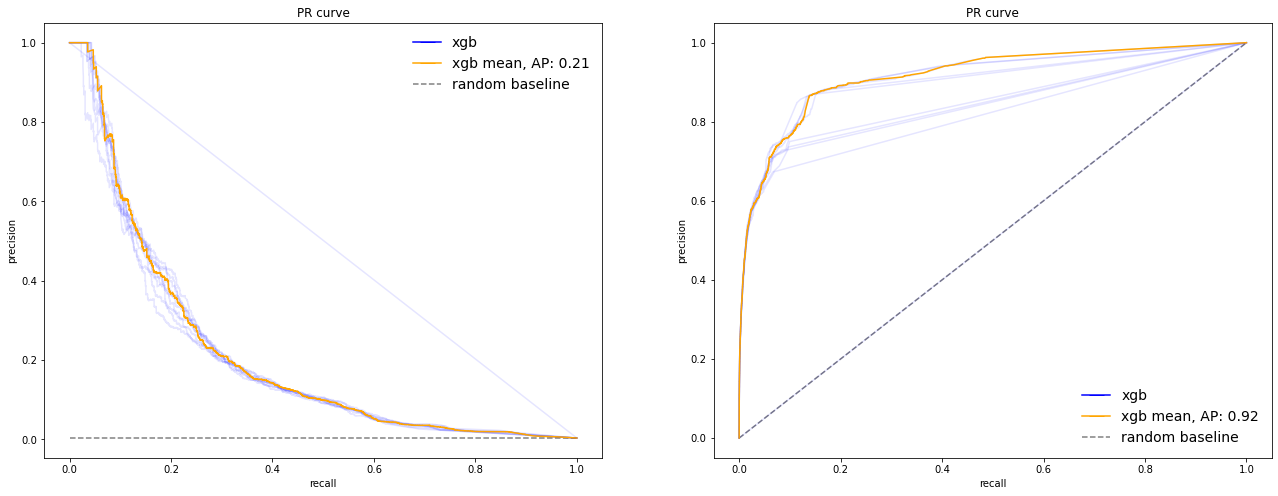

In [173]:
xgb_pred_mean = np.array(xgb_hp_df['test_preds']).mean(axis = 0)
xgb_pred_std = np.array(xgb_hp_df['test_preds']).std(axis = 0)

random_ap_base = (y_test>0).mean()
xgb_mean_precision, xgb_mean_recall, _ = metrics.precision_recall_curve(y_test, rf_pred_mean) 
xgb_mean_AP = metrics.average_precision_score(y_test, rf_pred_mean)

xgb_mean_fpr, xgb_mean_tpr, _ =  metrics.roc_curve(y_test, rf_pred_mean) 
xgb_mean_AUC = metrics.roc_auc_score(y_test, rf_pred_mean)
# -------------------------------------------------------------------------
# Fig
plt.figure(figsize = [22,8])

# ---------------------------------------------------------------------------
#PR/AP
plt.subplot(1,2,1)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.hlines(random_ap_base, 0, 1, linestyles='dashed', color = 'gray')

for i in xgb_hp_df['PR']: 
    
    plt.plot(i[1], i[0], color = 'blue', alpha = 0.1)
    
plt.plot(xgb_mean_recall,xgb_mean_precision, color = 'orange', alpha = 1)

    
xgb_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
xgb_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {xgb_mean_AP:.2}')
random_ap_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[xgb_line, xgb_mean_line, random_ap_line],frameon = False, fontsize = 14)


# ---------------------------------------------------------------------------
#ROC/AUC
plt.subplot(1,2,2)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

for i in xgb_hp_df['ROC']: 
    
    plt.plot(i[0], i[1], color = 'blue', alpha = 0.1)
    
plt.plot(xgb_mean_fpr,xgb_mean_tpr, color = 'orange', alpha = 1)

    
xgb_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
xgb_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {xgb_mean_AUC:.2}')
random_auc_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[xgb_line, xgb_mean_line, random_auc_line],frameon = False, fontsize = 14)

plt.show()


# old:

In [158]:
import os
import numpy as np
import pandas as pd

import pickle
import time


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import cm
import seaborn as sns

# some prob need fitting now... 
#from utils_dce import test_val_train
from utils_ens import get_Xy_tt

#from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics

from IPython.display import clear_output

In [ ]:
# parameters = {"learning_rate": [0.1, 0.01, 0.001],
#                "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#                "max_depth": [2, 4, 7, 10],
#                "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
#                "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
#                "reg_alpha": [0, 0.5, 1],
#                "reg_lambda": [1, 1.5, 2, 3, 4.5],
#                "min_child_weight": [1, 3, 5, 7],
#                "n_estimators": [100, 250, 500, 1000]}

In [159]:
XGBClassifier?

Init signature:
XGBClassifier(
    *,
    objective='binary:logistic',
    use_label_encoder=True,
    **kwargs,
)
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
        we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify 

This script/notebok is designed to be by a bag an forth iterration, nudging me closer to the hp-ranges I want to use for the larger ensample.
It needs to be reassesed when I have the full set.
It can be slightly modified to accomodate XGboost instead of random forest. 

In [157]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/xgb_selected_features.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/selected_features.pkl', 'rb')
selected_features = pickle.load(pkl_file)
pkl_file.close()

selected_features

features        AP
0          cm_mu_l  0.173872
1     dce_mu_s_acc  0.194898
2         dce_mu_l  0.200384
3     dce_mu_slope  0.206429
4      cm_mu_l_acc  0.205303
5         dce_mu_s  0.203503
6   dce_mu_l_slope  0.201774
7      cm_mu_slope  0.207068
8      dce_mu_mass  0.206458
9   dce_mu_s_slope  0.205132
10   cm_mu_l_slope  0.201541
11   cm_mu_s_slope  0.203060
12   dce_mu_l_mass  0.197657
13   dce_mu_s_mass  0.202121
14      dce_mu_acc  0.196112
15    cm_mu_l_mass  0.194068
16       cm_mu_acc  0.196483
17     cm_mu_s_acc  0.195626
18      cm_mu_mass  0.200820
19       dce_var_s  0.195320
20         cm_mu_s  0.205489
21       dce_var_l  0.205489
22        cm_var_l  0.195447
23    cm_mu_s_mass  0.195715
24         dce_var  0.196664
25          dce_mu  0.197495
26        cm_var_s  0.196074
27          cm_var  0.194748
28    dce_mu_l_acc  0.177972
29           cm_mu  0.183470

In [2]:
# get df:
pkl_file = open('/home/simon/Documents/Articles/conflict_prediction/data/computerome/currents/xgb_selected_features.pkl', 'rb')
#pkl_file = open('/home/projects/ku_00017/data/generated/currents/selected_features.pkl', 'rb')
selected_features = pickle.load(pkl_file)
pkl_file.close()

selected_features

features        AP
0          cm_mu_l  0.178385
1         dce_mu_s  0.202981
2      dce_mu_mass  0.214659
3    cm_mu_l_slope  0.220544
4   dce_mu_s_slope  0.220956
5   dce_mu_l_slope  0.221284
6     dce_mu_slope  0.221155
7         dce_mu_l  0.221030
8     dce_mu_s_acc  0.221330
9    cm_mu_s_slope  0.222087
10     cm_mu_slope  0.220978
11   dce_mu_s_mass  0.221131
12        cm_var_l  0.221266
13        cm_var_s  0.221266
14         dce_var  0.221266
15       dce_var_s  0.221266
16       dce_var_l  0.221266
17          cm_var  0.221266
18   dce_mu_l_mass  0.218971
19    cm_mu_l_mass  0.214963
20          dce_mu  0.214632
21    dce_mu_l_acc  0.214937
22     cm_mu_l_acc  0.216286
23      dce_mu_acc  0.216463
24      cm_mu_mass  0.211762
25         cm_mu_s  0.209838
26    cm_mu_s_mass  0.209838
27       cm_mu_acc  0.198496
28     cm_mu_s_acc  0.198101
29           cm_mu  0.183301

In [26]:
X_train, y_train, X_test, y_test = get_Xy_tt(local = True)

X_train: (2818728, 30)
y_train: (2818728,)
X_test: (384372, 30)
y_test: (384372,)


In [68]:
# n_rounds = 10

# # SHOULD HAVE DEDICATED FEATURE SELECTION FOR XGBOOST!
# best_features = selected_features['features'][:4].values # four first chosen features from forward featurte selection.
# #best_features = selected_features['features'].values # four first chosen features from forward featurte selection.


# n_estimators_list = []
# max_depth_list = []
# gamma_list = []
# reg_lambda_list = []

# # see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for more.

# train_preds = []
# test_preds = []

# AUC_train_list = []
# AP_train_list = []
# BS_train_list = []

# pr_train_list = []
# roc_train_list = []

# AUC_test_list = [] 
# AP_test_list = []
# BS_test_list = []

# pr_test_list = []
# roc_test_list = []

# W_feature0_list = []
# W_feature1_list = []

# print('Beginning loop')
# for i in range(n_rounds):

#     # Constant hyper paremeters:


#     # Variable hyper parameters
#     n_estimators = np.random.randint(32,128)
#     max_depth = np.random.randint(2,6)
#     gamma = np.random.uniform(0.01, 1)
#     reg_lambda = np.random.uniform(0.01, 0.9)
    

#     model = XGBClassifier(n_estimators=n_estimators, max_depth = max_depth, gamma = gamma, reg_lambda = reg_lambda, random_state=42, n_jobs= 4, objective='binary:logistic', use_label_encoder=False)


#     #undersampling
#     #sub1_index_train = y_train[y_train > 0].index
#     #sub0_index_train = np.random.choice(y_train[y_train == 0].index, sub1_index_train.shape[0])
#     #sub_index_train = np.concatenate((sub1_index_train, sub0_index_train), axis=0)
#     #np.random.shuffle(sub_index_train)

#     model.fit(X_train[best_features], y_train)

#     y_train_pred = model.predict_proba(X_train[best_features])[:,1]
#     y_test_pred = model.predict_proba(X_test[best_features])[:,1]

#     # baysian correction
#     # 


#     # metrics
#     AUC_train_list.append(metrics.roc_auc_score(y_train, y_train_pred))
#     AP_train_list.append(metrics.average_precision_score(y_train, y_train_pred))
#     BS_train_list.append(metrics.brier_score_loss(y_train, y_train_pred))

#     precision_train, recall_train, _ = metrics.precision_recall_curve(y_train, y_train_pred)
#     fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred)

#     pr_train_list.append((precision_train, recall_train))
#     roc_train_list.append((fpr_train, tpr_train))

#     AUC_test_list.append(metrics.roc_auc_score(y_test, y_test_pred))
#     AP_test_list.append(metrics.average_precision_score(y_test, y_test_pred))
#     BS_test_list.append(metrics.brier_score_loss(y_test, y_test_pred))

#     precision_test, recall_test, _ = metrics.precision_recall_curve(y_test, y_test_pred)
#     fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred)    

#     pr_test_list.append((precision_test, recall_test))
#     roc_test_list.append((fpr_test, tpr_test))
    
#     n_estimators_list.append(n_estimators)
#     max_depth_list.append(max_depth)
#     gamma_list.append(gamma)
#     reg_lambda_list.append(reg_lambda)
    
#     train_preds.append(y_train_pred)
#     test_preds.append(y_test_pred)

#     clear_output(wait = True)
#     print(f'{i+1}/{n_rounds} done')


In [116]:
n_rounds = 100

# SHOULD HAVE DEDICATED FEATURE SELECTION FOR XGBOOST!
best_features = selected_features['features'][:4].values # four first chosen features from forward featurte selection.
#best_features = selected_features['features'].values # four first chosen features from forward featurte selection.


n_estimators_list = []
max_depth_list = []
gamma_list = []
reg_lambda_list = []

# see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for more.

train_preds = []
test_preds = []

AUC_train_list = []
AP_train_list = []
BS_train_list = []

pr_train_list = []
roc_train_list = []

AUC_test_list = [] 
AP_test_list = []
BS_test_list = []

pr_test_list = []
roc_test_list = []

W_feature0_list = []
W_feature1_list = []

baysian_correction = {'train_b1' : [], 'test_b1' : [], 'train_b2' : [], 'test_b2' : [] }

print('Beginning loop')
for i in range(n_rounds):

    # Constant hyper paremeters:


    # Variable hyper parameters
    n_estimators = np.random.randint(32,128)
    max_depth = np.random.randint(2,6)
    gamma = np.random.uniform(0.01, 1)
    reg_lambda = np.random.uniform(0.01, 0.9)
    

    model = XGBClassifier(n_estimators=n_estimators, max_depth = max_depth, gamma = gamma, reg_lambda = reg_lambda, random_state=42, n_jobs= 4, objective='binary:logistic', use_label_encoder=False)


    #undersampling
    sub1_index_train = y_train[y_train > 0].index
    sub0_index_train = np.random.choice(y_train[y_train == 0].index, sub1_index_train.shape[0]*2)
    sub_index_train = np.concatenate((sub1_index_train, sub0_index_train), axis=0)
    np.random.shuffle(sub_index_train)

    model.fit(X_train[best_features].loc[sub_index_train], y_train.loc[sub_index_train])

    y_train_pred = model.predict_proba(X_train[best_features].loc[sub_index_train])[:,1]
    y_test_pred = model.predict_proba(X_test[best_features])[:,1]

    # -------------------------------------------------------------

    # baysian correction - not sure it does its thing...
     # this is the right way becaus what you get is the predicted prob times the actual prob given the pedicted prob. But you need a threshold
     # also looking at plots and histogram and shit this seems most "rigth"
    train_preds_binary = (y_train_pred > 0.5) *1 # 0.5 aprtrairy threshold.. but seems ok since you balanced the set.
    BA = (((train_preds_binary == 1) & (y_train.loc[sub_index_train] == 1)) *1).mean()
    BnA = (((train_preds_binary == 1) & (y_train.loc[sub_index_train] == 0)) *1).mean()
    A = y_train.mean()
    nA = 1 - A
    bc = (BA * A)/((BA * A)+(BnA * nA))

    y_train_pred = y_train_pred*bc
    y_test_pred = y_test_pred*bc


    # alt baysian correction - not sure it does its thing...
    # BA_train = y_train_pred
    # BnA_train = 1-BnA
    # A_train = y_train.mean()
    # nA_train = 1 - A_train
    # y_train_pred_b2 = (BA_train * A_train)/((BA_train * A_train)+(BnA_train * nA_train))

    # BA_test = y_test_pred
    # BnA_test = 1-BnA
    # A_test = y_test.mean()
    # nA_test = 1 - A_test
    # y_test_pred_b2 = (BA_test * A_test)/((BA_test * A_test)+(BnA_test * nA_test))

    # baysian_correction['train_b1'].append(y_train_pred_b1)
    # baysian_correction['test_b1'].append(y_test_pred_b1)
    # baysian_correction['train_b2'].append(y_train_pred_b2)
    # baysian_correction['test_b2'].append(y_test_pred_b2)

    # -----------------------------------------------------------

    # metrics
    AUC_train_list.append(metrics.roc_auc_score(y_train.loc[sub_index_train], y_train_pred))
    AP_train_list.append(metrics.average_precision_score(y_train.loc[sub_index_train], y_train_pred))
    BS_train_list.append(metrics.brier_score_loss(y_train.loc[sub_index_train], y_train_pred))

    precision_train, recall_train, _ = metrics.precision_recall_curve(y_train.loc[sub_index_train], y_train_pred)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train.loc[sub_index_train], y_train_pred)

    pr_train_list.append((precision_train, recall_train))
    roc_train_list.append((fpr_train, tpr_train))

    AUC_test_list.append(metrics.roc_auc_score(y_test, y_test_pred))
    AP_test_list.append(metrics.average_precision_score(y_test, y_test_pred))
    BS_test_list.append(metrics.brier_score_loss(y_test, y_test_pred))

    precision_test, recall_test, _ = metrics.precision_recall_curve(y_test, y_test_pred)
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred)    

    pr_test_list.append((precision_test, recall_test))
    roc_test_list.append((fpr_test, tpr_test))
    
    n_estimators_list.append(n_estimators)
    max_depth_list.append(max_depth)
    gamma_list.append(gamma)
    reg_lambda_list.append(reg_lambda)
    
    train_preds.append(y_train_pred)
    test_preds.append(y_test_pred)

    clear_output(wait = True)
    print(f'{i+1}/{n_rounds} done')


100/100 done


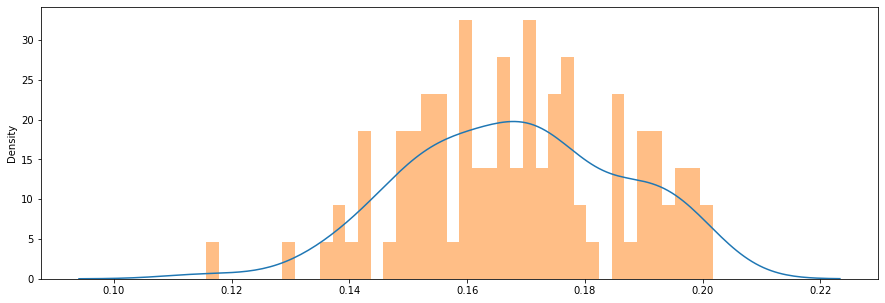

In [96]:
print()

plt.figure(figsize = [15,5])
plt.hist(AP_test_list, bins = 40, density=True, alpha = 0.5, label = 'test', color = 'C1')
sns.kdeplot(AP_test_list)
plt.show()

In [97]:
hp_df = pd.DataFrame({'n_estimators' : n_estimators_list, 'max_depth' : max_depth_list, 'gamma' : gamma_list, 'reg_lambda' : reg_lambda_list, 
                      'test_preds' : test_preds, 'AP' : AP_test_list})

/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/simon/anaconda3/envs/xgb_env/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


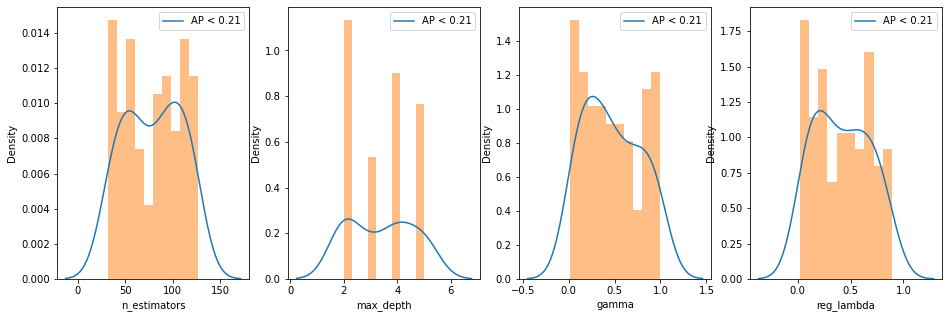

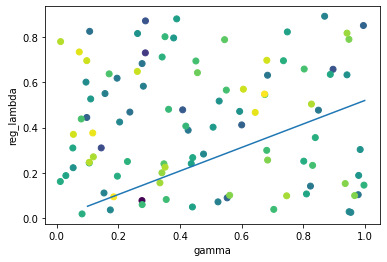

In [98]:
plt.figure(figsize = [20,5])

for i,j in enumerate(hp_df.columns[:4]):
    plt.subplot(1,5,i+1)

    sns.kdeplot(hp_df[hp_df['AP'] >= 0.21][j], label = 'AP >= 0.21', bw_method= 0.5) 
    sns.kdeplot(hp_df[hp_df['AP'] < 0.21][j], label = 'AP < 0.21', bw_method= 0.5)

    plt.hist(hp_df[hp_df['AP'] >= 0.21][j], color = 'C0', density = True, alpha = 0.5) 
    plt.hist(hp_df[hp_df['AP'] < 0.21][j], color = 'C1', density = True, alpha = 0.5)

    plt.legend()

plt.show()

# I have looked at hte other parameters and there does not appear to be a relationship

plt.scatter(hp_df['gamma'], hp_df['reg_lambda'], c= hp_df['AP'])
plt.xlabel('gamma')
plt.ylabel('reg_lambda')

x_grid = np.arange(0.1,1.1,0.1)
y_grid = x_grid * 0.52

plt.plot(x_grid, y_grid)

plt.show()

good values:
n_estimators: 

In [99]:
hp_df.sort_values('AP', ascending= False)[:20]

n_estimators  max_depth     gamma  reg_lambda  \
93            58          2  0.674589    0.548748   
2            117          2  0.184816    0.093720   
16           100          2  0.116852    0.376324   
9             49          2  0.644412    0.467318   
48            81          2  0.073130    0.734949   
56            33          4  0.053924    0.370205   
19            34          2  0.682166    0.698077   
6             55          2  0.097419    0.696471   
67            42          2  0.606009    0.570146   
11           106          2  0.261717    0.648761   
85            73          2  0.105648    0.246410   
75            57          2  0.012432    0.780795   
12            48          2  0.827060    0.504307   
95            63          2  0.351788    0.225040   
24           117          2  0.118782    0.270687   
30            67          2  0.746568    0.098231   
70            46          2  0.335087    0.155749   
99            50          2  0.942634    0.818310   
49           125          2  0.341508    0.200085   
92            55          2  0.936734    0.152510   

                                           test_preds        AP  
93  [3.4969284e-07, 3.4969284e-07, 3.4969284e-07, ...  0.201777  
2   [1.493485e-07, 1.493485e-07, 1.493485e-07, 1.4...  0.201115  
16  [1.6374511e-07, 1.6374511e-07, 1.6374511e-07, ...  0.199114  
9   [6.040167e-07, 6.040167e-07, 6.040167e-07, 6.0...  0.198554  
48  [2.487582e-07, 2.487582e-07, 2.487582e-07, 2.4...  0.197832  
56  [5.5197575e-07, 5.5197575e-07, 5.5197575e-07, ...  0.196017  
19  [9.915561e-07, 9.915561e-07, 9.915561e-07, 9.9...  0.195726  
6   [1.791802e-07, 1.791802e-07, 1.791802e-07, 1.7...  0.195318  
67  [9.0643937e-07, 9.0643937e-07, 9.0643937e-07, ...  0.195291  
11  [8.979384e-08, 8.979384e-08, 8.979384e-08, 8.9...  0.194744  
85  [2.6904408e-07, 2.6904408e-07, 2.6904408e-07, ...  0.192362  
75  [5.7101715e-07, 5.7101715e-07, 5.7101715e-07, ...  0.192347  
12  [4.930178e-07, 4.930178e-07, 4.930178e-07, 4.9...  0.191635  
95  [5.4023104e-07, 5.4023104e-07, 5.4023104e-07, ...  0.191593  
24  [9.374749e-08, 9.374749e-08, 9.374749e-08, 9.3...  0.190707  
30  [2.850084e-07, 2.850084e-07, 2.850084e-07, 2.8...  0.190117  
70  [9.023885e-07, 9.023885e-07, 9.023885e-07, 9.0...  0.189749  
99  [7.113579e-07, 7.113579e-07, 7.113579e-07, 7.1...  0.188870  
49  [7.635053e-08, 7.635053e-08, 7.635053e-08, 7.6...  0.188003  
92  [2.2646785e-07, 2.2646785e-07, 2.2646785e-07, ...  0.185893

In [100]:
os.system("mpg123 /home/simon/Music/sounds/FF7Victory.mp3")

0

So from here you don't really have to pickle anything... Can you pickle a generator?

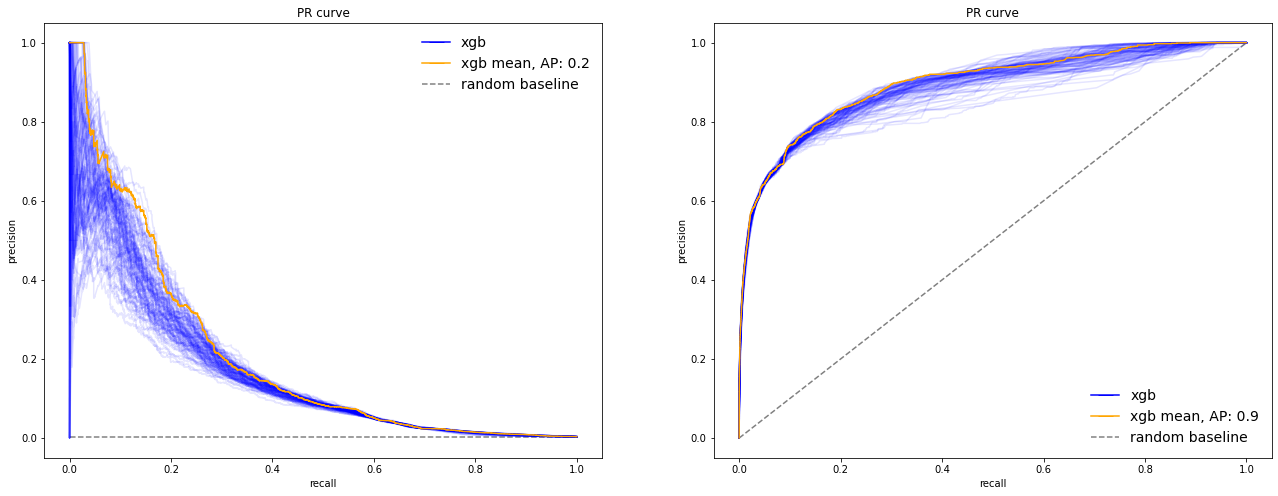

In [101]:
rf_pred_mean = np.array(hp_df['test_preds']).mean(axis = 0)
rf_pred_std = np.array(hp_df['test_preds']).std(axis = 0)

random_ap_base = (y_test>0).mean()
rf_mean_precision, rf_mean_recall, _ = metrics.precision_recall_curve(y_test, rf_pred_mean) 
rf_mean_AP = metrics.average_precision_score(y_test, rf_pred_mean)

rf_mean_fpr, rf_mean_tpr, _ =  metrics.roc_curve(y_test, rf_pred_mean) 
rf_mean_AUC = metrics.roc_auc_score(y_test, rf_pred_mean)
# -------------------------------------------------------------------------
# Fig
plt.figure(figsize = [22,8])

# ---------------------------------------------------------------------------
#PR/AP
plt.subplot(1,2,1)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.hlines(random_ap_base, 0, 1, linestyles='dashed', color = 'gray')

for i in pr_test_list: 
    
    plt.plot(i[1], i[0], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_recall,rf_mean_precision, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AP:.2}')
random_ap_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_ap_line],frameon = False, fontsize = 14)


# ---------------------------------------------------------------------------
#ROC/AUC
plt.subplot(1,2,2)

plt.title('PR curve')
plt.ylabel('precision')
plt.xlabel('recall')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

for i in roc_test_list: 
    
    plt.plot(i[0], i[1], color = 'blue', alpha = 0.1)
    
plt.plot(rf_mean_fpr,rf_mean_tpr, color = 'orange', alpha = 1)

    
rf_line = mlines.Line2D([], [], color='blue', marker='_', markersize=15, label='xgb')
rf_mean_line = mlines.Line2D([], [], color='orange', marker='_', markersize=15, label=f'xgb mean, AP: {rf_mean_AUC:.2}')
random_auc_line = mlines.Line2D([], [], color='gray', linestyle='--', markersize=15, label='random baseline')

plt.legend(handles=[rf_line, rf_mean_line, random_auc_line],frameon = False, fontsize = 14)

plt.show()
